In [1]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [2]:
#in modules/FT/FT.py there is a module that does the same. In modules/FT, there is an example on how to use it.

def format_ticks(sub,_M_xticks,_M_yticks,_M_xticks_exception,_M_yticks_exception,_m_xticks,_m_yticks,
                 xmin='',xmax='',ymin='',ymax=''):
    '''
    Logarithmic tick format for matplotlib. Change M_x,M_y to change the format fo the ticks.
    
    sub: the subplot (assumed  something like sub = fig.add_subplot...)
    _M_xticks,_M_yticks: lists of major ticks
    _M_xticks_exception,_M_yticks_exception: lists of major ticks that will not be labeled
    _m_xticks,_m_yticks:lists of minor ticks 
    
    NOTE: first set the scale to 'log' and then run format_ticks!!
    '''
    
    
    #these have to be here!
    #if you don't change all limits, I will do it automatically (min and max of _M_xticks and _M_yticks) 
    if not '' in [xmin,xmax,ymin,ymax]:   
        sub.set_xlim(xmin,xmax)
        sub.set_ylim(ymin,ymax)
    else:
        print('Empty axis limits. Using automatic ones.')
        sub.set_xlim(min(_M_xticks),max(_M_xticks))
        sub.set_ylim(min(_M_yticks),max(_M_yticks))

    #set functions that format the ticks 
    #value is the number on the axis, tick_number the number of the corresponding tick
    def M_x(value, tick_number):
        if value in _M_xticks_exception:
            return ''
        
        if value==1:
            return '$1$'
        
        if value==0:
            return '$0$' 
        
        if value!=0:
            exp=int(np.log10(value))
            _v=value/10**exp
            if round(_v,2)==1.:
                return '$10^{0}{1}{2}$'.format('{', exp ,'}')
            else:
                return  '${0}{1}10^{2}{3}{4}$'.format(_v ,r'\times', '{', exp ,'}')
        


        
    def M_y(value, tick_number):
        if value in _M_yticks_exception:
            return ''
        
        if value==1:
            return '$1$'
        
        if value==0:
            return '$0$'   
        
        if value!=0:
            exp=int(np.log10(value))
            _v=value/10**exp
            if round(_v,2)==1.:
                return '$10^{0}{1}{2}$'.format('{', exp ,'}')
            else:
                return  '${0} {1} 10^{2}{3}{4}$'.format(_v ,r'\times', '{', exp ,'}')
        


    
    #set the major ticks
    sub.xaxis.set_major_locator(plt.FixedLocator(_M_xticks))
    sub.xaxis.set_major_formatter(plt.FuncFormatter(M_x))
    
    sub.yaxis.set_major_locator(plt.FixedLocator(_M_yticks))
    sub.yaxis.set_major_formatter(plt.FuncFormatter(M_y))
    
    #set the major ticks
    sub.xaxis.set_minor_locator(plt.FixedLocator(_m_xticks))  
    sub.yaxis.set_minor_locator(plt.FixedLocator(_m_yticks))

<IPython.core.display.Javascript object>


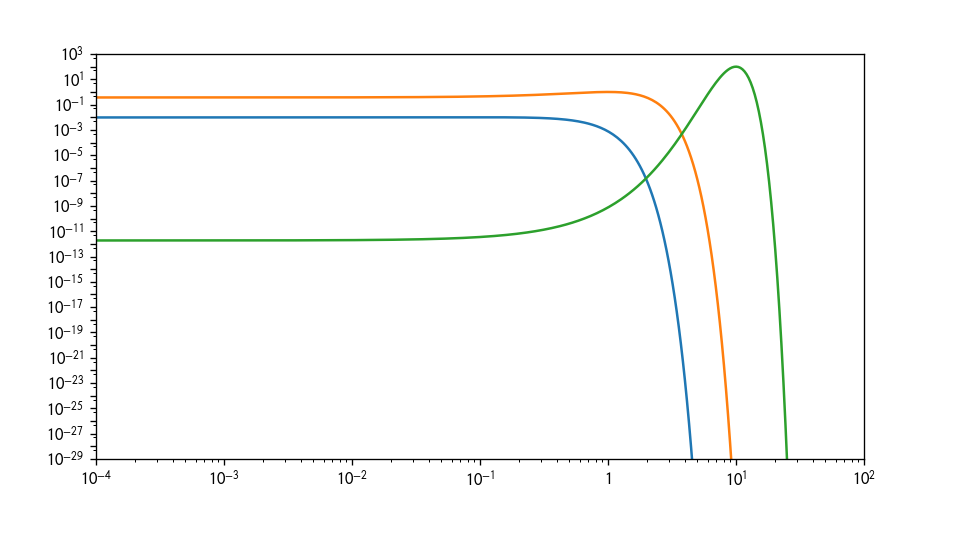

In [3]:
#==========================--Example: how to format the ticks--===========================================#

fig=plt.figure(figsize=(8,4.5))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.5)
fig.suptitle('')
#=============================================================================#


sub = fig.add_subplot(1,1, 1)

X=np.logspace(-4,4,500)


for i in [-1,0,1]:
    Y=10**(2*i)*np.exp(-(X-10**i)**2/10**(i/2.))
    sub.plot(X,Y)



#set major ticks
_M_xticks=[10**i for i in range(-4,3)]
_M_yticks=[10**i for i in range(-30,4)]

#set major ticks that will not have a label
_M_xticks_exception=[]
_M_yticks_exception=[10**i for i in range(-30,4,2)]
#_M_yticks_exception.remove(1e-30)

#set minor ticks minor ticks don't have labels
_m_xticks=[j*10**i for i in range(-4,2) for j in range(2,10) ]
_m_yticks=[j*10**i for i in range(-30,4) for j in [5] ]  

#set scales
sub.set_xscale('log')
sub.set_yscale('log')

format_ticks(sub,
             _M_xticks,_M_yticks,
             _M_xticks_exception,_M_yticks_exception,
             _m_xticks,_m_yticks,
             xmin=1e-4,xmax=1e2,ymin=1e-29,ymax=1e3)

plt.show()

<IPython.core.display.Javascript object>


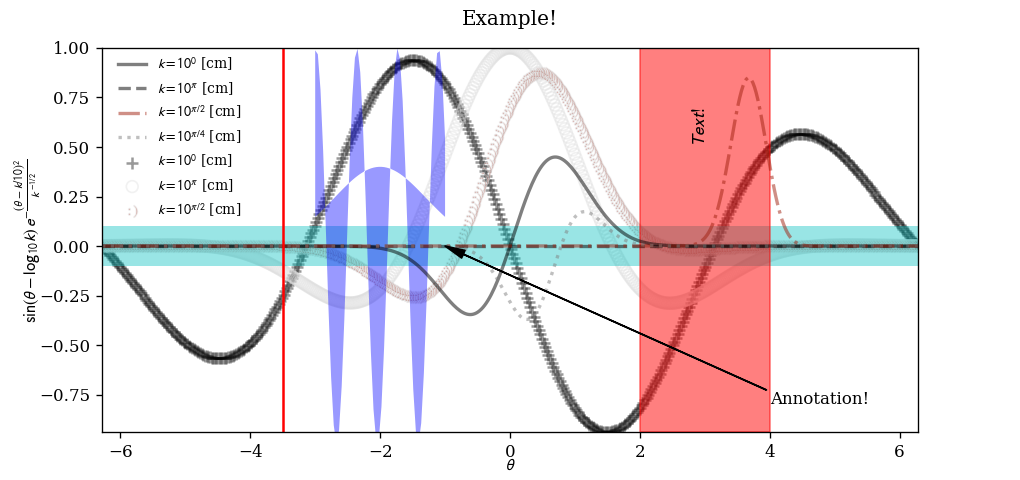

In [4]:
#==========================--Example: useful plots--===========================================#

fig=plt.figure(figsize=(8.5,4))
fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.5)
fig.suptitle('Example!')
#=============================================================================#


sub = fig.add_subplot(111)

X=np.linspace(-2*np.pi,2*np.pi,500)

#=======================plot=======================#
#we will cycle through linestyles and colors, so import cycle
from itertools import cycle

#define linestyles
_LS=['-','--','-.',':']
_linestyles=cycle(_LS)


#define colors (also in Hexadecimal!)
_C=['k','#A0200F','grey','b','c','m','r','g','y']
_colors=cycle(_C)
#initialize it, because we'll only change color when we ru out of linestyles
_c=_colors.next()


#i will use this counter to cycle through all possible combinations of _colors and _linestyles
_count=0
_reset_count=len(_LS)-1

ymin=np.inf
ymax=-np.inf

_r1=[0,1,1/2.,1/4.]
_r2=['0','\pi','\pi/2','\pi/4']
for i,_l in zip(_r1,_r2):
    _count+=1
    
    k=10**(np.pi*i)
    Y=np.sin(X-np.log10(k))*np.exp(-(X-0.1*k)**2./(k**-0.5))
    
    _ls=_linestyles.next()
    if _count>= _reset_count:
        _c=_colors.next()
    
    sub.plot(X,Y,c=_c,linestyle=_ls,alpha=0.5,linewidth=2,label='$k=10^{0}{1}{2}$ [cm]'.format('{', _l ,'}'))
        
    #this finds automatically the maximum of all Y's (you can change it!)
    _tmp=min(Y)
    if _tmp<ymin:
        ymin=_tmp

    _tmp=max(Y)
    if _tmp>ymax:
        ymax=_tmp
        

    

    
#=======================scatter plot=======================#
#define markers (can anything inside $$!)
_MK=['+','o','$:)$']
_markers=cycle(_MK)
#define colors (again!)
_C=['k','','#A0200F','grey','b','c','m','r','g','y']
_colors=cycle(_C)
#initialize it, because we'll only change color when we ru out of markers
_c=_colors.next()


#i will use this counter to cycle through all possible combinations of _colors and _linestyles
_count=0
_reset_count=len(_MK)-1
    
_r1=[-1,-1/2.,-1/4.]
_r2=['0','\pi','\pi/2','\pi/4']
for i,_l in zip(_r1,_r2):
    _count+=1
    
    k=10**(np.pi*i)
    Y=np.sin(X-np.log10(k))*np.exp(-(X-0.1*k)**2./(k**-0.5))
    
    _mk=_markers.next()
    if _count>= _reset_count:
        _c=_colors.next()
        
    sub.scatter(X,Y,c=_c,marker=_mk,edgecolors='#DDDDDD',alpha=0.4,s=50,linewidths=1,
                label='$k=10^{0}{1}{2}$ [cm]'.format('{', _l ,'}'))
        
    #this finds automatically the maximum of all Y's (you can change it!)
    _tmp=min(Y)
    if _tmp<ymin:
        ymin=_tmp

    _tmp=max(Y)
    if _tmp>ymax:
        ymax=_tmp    
    
    
#=======================vertical line=======================#
sub.axvline(x=-3.5,c='r')    
    
#=======================fill=======================#
#horixontal
#fill between -0.1 and 0.1
sub.fill_between(X,-0.1,0.1, facecolor='c',alpha=0.4)

#fill between sin(10x) and 0.4*exp((_x+2)^2) for x:[-3,-1]
_x=np.linspace(-3,-1,50)
sub.fill_between(_x,np.sin(_x*10),0.4*np.exp(-(_x+2)**2), facecolor='b',alpha=0.4)

#vertical
sub.axvspan(2,4, alpha=0.5, color='red')
    
    
#=======================annotate=======================#
sub.annotate('Annotation!', xy=(-1,0), xytext=(4,-0.8),
            arrowprops=dict(facecolor='black', shrink=0.,headwidth=5,width=0.1) 
            )

 
#=======================text=======================#
sub.text(3,0.5, r'$Text!$', fontsize=11,
               rotation=90, rotation_mode='anchor')
    
#labels, limits, etc.
sub.legend(bbox_to_anchor=(0.02, 0.98),borderaxespad=0., borderpad=0,ncol=1,loc=2,fontsize='small',framealpha=0)

sub.set_xlabel(r'$\theta$')
sub.xaxis.set_label_coords(0.5, -0.065) 
sub.set_ylabel(r'$\sin{\left( \theta - \log_{10}k \right)} \, e^{-\dfrac{(\theta-k/10)^2}{k^{-1/2}} } $ ',
               labelpad=-2)
#labelpad and set_label_coords do more or less the same thing

xmin=min(X)
xmax=max(X)
sub.set_xscale('linear')
sub.set_yscale('linear')
sub.set_xlim(xmin,xmax)
sub.set_ylim(ymin,ymax) 
plt.show()